# Optional Lab: Multiple Variable Linear Regression

In this lab, you will extend the data structures and previously developed routines to support multiple features. Several routines are updated making the lab appear lengthy, but it makes minor adjustments to previous routines making it quick to review.
# Outline
- [&nbsp;&nbsp;1.1 Goals](#toc_15456_1.1)
- [&nbsp;&nbsp;1.2 Tools](#toc_15456_1.2)
- [&nbsp;&nbsp;1.3 Notation](#toc_15456_1.3)
- [2 Problem Statement](#toc_15456_2)
- [&nbsp;&nbsp;2.1 Matrix X containing our examples](#toc_15456_2.1)
- [&nbsp;&nbsp;2.2 Parameter vector w, b](#toc_15456_2.2)
- [3 Model Prediction With Multiple Variables](#toc_15456_3)
- [&nbsp;&nbsp;3.1 Single Prediction element by element](#toc_15456_3.1)
- [&nbsp;&nbsp;3.2 Single Prediction, vector](#toc_15456_3.2)
- [4 Compute Cost With Multiple Variables](#toc_15456_4)
- [5 Gradient Descent With Multiple Variables](#toc_15456_5)
- [&nbsp;&nbsp;5.1 Compute Gradient with Multiple Variables](#toc_15456_5.1)
- [&nbsp;&nbsp;5.2 Gradient Descent With Multiple Variables](#toc_15456_5.2)
- [6 Congratulations](#toc_15456_6)

### 1.1 목표

- 여러개의 feature를 지원하기 위해 선형 회귀 모델 확장
    - 다수의 feature를 지원하기 위해 데이터 구조 확장
    - 다수의 feature를 지원하기 위해 예측(prediction), cost(비용), 기울기(경사/미분) 재작성(rewrite)
    - 속도와 단순함을 구현하기 위해 벡터화하기 위해 numpy의 'np.dot' 함수 활용

### 1.2 도구
- numpy , 컴퓨터 과학을 위한 유명한 라이브러리
- matplotlib , 데이터 활용한 그래프 그리는 라이브러리

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')
np.set_printoptions(precision=2)  #numpy 배열의 정확도를 줄이면서 표시

<a name="toc_15456_1.3"></a>
## 1.3 Notation 표기법
Here is a summary of some of the notation you will encounter, updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||<br>
| $a$ | scalar, non bold                                                      ||<br>
| $\mathbf{a}$ | vector, bold                                                 ||<br>
| $\mathbf{A}$ | matrix, bold capital 대문자                                  ||<br>
| **Regression** |         |    |     |<br>
|  $\mathbf{X}$ | training example maxtrix(학습 예제 샘플 데이터)| `X_train` |<br> 
|  $\mathbf{y}$  | training example  targets(레이블,정답)        | `y_train` |<br> 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|<br> 
| m | number of training examples | `m`|<br> 
| n | number of features in each example | `n`|<br> 
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |<br> 
|  $b$           |  parameter: bias                          | `b`    |<br> 
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |

# 2 문제 설명

주택 가격 예측의 동기를 부여하는 예를 사용하게 됩니다. 훈련 데이터 세트에는 아래 표에 표시된 4가지 특성(크기, 침실, 층, 연령)이 포함된 3가지 예가 포함되어 있습니다. 이전 연구실과 달리 크기는 1000평방피트가 아닌 평방피트 단위입니다. 이로 인해 문제가 발생하며 다음 실습에서 이 문제를 해결할 것입니다!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |

위의 값들을 이용하여 선형  회귀 모델을 만들것이고 다른 집들에 대한 가격을 예측할 수 있음

For example, a house with 1200 평방미터, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

<a name="toc_15456_2.1"></a>
## 2.1 학습데이터를 포함하는 X행렬 

Similar to the table above, examples(데이터) are stored in a NumPy matrix `X_train`. Each row(행) of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ 는 i번째 sample(data). $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j번째 in example i번째. 
괄호에서의 윗첨자는 sample 데이터의 개수이고 아래첨자는 요소(성분,element)를 표시함
입력 데이터 표시


In [3]:
#데이터는 numpy의 배열/행렬에 저장됨
print(f"X shape: {X_train.shape},X Type:{type(X_train)})") #X 대문자 행렬
print(X_train)
print(f"y shape: {y_train.shape},X Type:{type(y_train)})")  #y 소문자 행렬
print(y_train)

X shape: (3, 4),X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y shape: (3,),X Type:<class 'numpy.ndarray'>)
[460 232 178]


<a name="toc_15456_2.2"></a>
## 2.2 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$개의 sample(trainig) 데이터 갯수.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - 일반적으로 열벡터로 표현함

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.
여기서 w가 벡터이고 b는 스칼라로 표현했지만
결과적으로 w는 행렬이 되고 b는 벡터가됨

In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
다변수를 가직 모델예측은 선형모델

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

## 3.1 요소별 단일 예측 요소
<a name="toc_15456_3.1"></a> 이전 예측에서는 하나의 특성 값에 하나의 매개변수를 곱하고 bias 매개변수를 추가했습니다. 여러 feature에 대한 이전 예측 구현을 직접 확장하는 것은 각 성분에 대한 반복문을 사용하여 위의 (1)을 구현하고 해당 매개변수와 곱셈을 수행한 다음 끝에 bias 매개변수를 추가함

In [5]:
def predict_single_loop(x,w,b):
    """
        선형 회귀를 사용하여 하나의 예측
        Args:
            x(ndarray): 여러개의 feature를 가진 샘플 => Shape(n,)
            w(ndarray): 모델 파라미터(우리가 찾고자 하는값) => Shape(n,)
            b(scalar): 모델 파라미터(우리가 찾고자 하는 값)
            
        Returns:
            p(scalar) : 예측치(prediction)
    """
    n = x.shape[0]
    p=0
    for i in range(n):
        p += x[i]*w[i]
#         p = p + p_i
    p = p + b
    return p

In [6]:
#학습(training) data로부터 하나의 행을 얻음
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value : {x_vec}")
f_wb = predict_single_loop(x_vec,w_init,b_init)
print(f"f_wb shape {f_wb.shape}, 예측 : {f_wb}")

x_vec shape (4,), x_vec value : [2104    5    1   45]
f_wb shape (), 예측 : 459.9999976194083


`x_vec`의 shape에 관심
4개의 elements를 가진 1-D Numpy 벡터(4,)이고
결과 `f_wb`는 스칼라

<a name="toc_15456_3.2"></a>
## 3.2 Single Prediction, vector

수시 (1)을 보면 위의 수식 (2)에서와 같이 내적을  사용하여 구현 할수있음 예측의 속도를 높이기 위해 벡터 연산을  사용함. 

Recall from the Python/Numpy lab that NumPy `np.dot()`[[link](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)] can be used to perform a vector dot product.

In [7]:
def predict(x, w, b):
    """
        선형 회귀를 사용하여 하나의 예측값 반환
        Args:
            x(ndarray): 여러개의 feature를 가진 샘플 => Shape(n, )
            w(ndarray): 모델 파라미터(우리가 찾고자 하는 값) => Shape(n, )
            b(scalar): 모델 파라미터(우리가 찾고자 하는 값)
        
        Returns : 
            p(scalar) : 예측치(prediction)
    """
    p = np.dot(x, w) + b
    return p

In [8]:
#학습(training) data로부터 하나의 행을 얻음
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value : {x_vec}")
f_wb = predict(x_vec,w_init,b_init)
print(f"f_wb shape {f_wb.shape}, 예측 : {f_wb}")

x_vec shape (4,), x_vec value : [2104    5    1   45]
f_wb shape (), 예측 : 459.9999976194082


결과와 형태는 Looping을 사용한 이전 버전과 동일합니다. 앞으로는 `np.dot`가 이러한 작업에 사용될 것입니다. 이제 예측은 단일 명령문입니다. 대부분의 루틴은 별도의 예측 루틴을 호출하는 대신 이를 직접 구현합니다.

<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
## 다수의 변수를 가지고 cost 계산

다변수를 이용한 cost 수식 $J(\mathbf{w},b)$ 은:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ 는 다수의 feature를 지원하기 위한 스칼라보다는 벡터이다.

아래 수식 (3) and (4). 
*이 과정을 위한 표준 패턴* 을 사용 
모든 `m` 대의 샘플을 for 문 이용함

In [9]:
def compute_cost(X,y,w,b):
    """
        cost 계산
        Args:
            X(ndarray(m.n)): 여러개의 feature를 가진 샘플 => Shape(m,n)
            y(ndarray(m.)): target(label,정답)
            w(ndarray): 모델 파라미터(우리가 찾고자 하는값) => Shape(n,)
            b(scalar): 모델 파라미터(우리가 찾고자 하는 값)

        Returns:
            p(scalar) : cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w)+b # (n,)(n,) = 스칼라 (np.dot) 참조
        cost = cost + (f_wb_i-y[i])**2
    cost = cost/(2*m)
    return cost

In [10]:
# 이전에 선택된 최적의 파라미터를 사용하여 cost를 계산하고 표 시
cost = compute_cost(X_train,y_train,w_init,b_init)
print(f'최적의 w에서의 cost: {cost}')

최적의 w에서의 cost: 1.5578904330213735e-12


**Expected Result**: Cost at optimal w : 1.5578904045996674e-12

<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
다변수 경사 하강법:

$$\begin{align*} \text{repeat}&\text{ until convergence(수렴):} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n 은 feature의 수, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction(hypothesis), while $y^{(i)}$ is the target value(label,정답)

<a name="toc_15456_5.1"></a>
## 5.1 다변수의  기울기(미분) 구하기
수식 (6) and (7) 구현하는것은 아래. 
There are many ways to implement this. In this version, there is an
- outer loop over 모든 m 개의 데이터를 외부 반복문에서 반복. 
   
   - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ sample 예제는 직접 계산되고 누적됨
   
   - 모든 n개의 features는 내부 반복문에서 반복:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ 는 각각의 $w_j$에 대하여 계산됨.

In [11]:
def compute_gradient(X,y,w,b):
    """
        선형 회귀를 위한 기울기(미분) 계산
        Args:
            X(ndarray(m.n)): 여러개의 feature를 가진 샘플 => Shape(m,n)
            y(ndarray(m.)): target(label,정답)
            w(ndarray): 모델 파라미터(우리가 찾고자 하는값) => Shape(n,)
            b(scalar): 모델 파라미터(우리가 찾고자 하는 값)
        Returns:
            dj_dw(ndarray(n,)) : cost(J)를 w로 미분함
            dj_db(스칼라) : cost(J)를 b로 미분함
            
    """
    m ,n= X.shape # training data의 수와 feature의 갯수
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = (np.dot(X[i],w)+b)-y[i] 
        #(np.dot(X[i],w)+b) => y_hat => prediction=> 모델의 출력
        for j in range(n):
            dj_dw[j] += err*X[i,j] # cost함수를 w미분한 결과를 err*x
        dj_db+=err # cost함수를 b미분한 결과를 err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db,dj_dw

In [12]:
tmp_dj_db,tmp_dj_dw = compute_gradient(X_train,y_train,w_init,b_init)
print(f'초기 w,b에서의 dj_db: {tmp_dj_db}')
print(f'초기 w,b에서의 dj_dw: {tmp_dj_dw}')   

초기 w,b에서의 dj_db: -1.6739251122999121e-06
초기 w,b에서의 dj_dw: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


**Expected Result**:   
dj_db at initial w,b: -1.6739251122999121e-06  
dj_dw at initial w,b:   
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]

## 5.2 다변수를 이용한 Gradient Descent(경사하강법) 

In [13]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_fn,alpha,num_iters):
    """
        theta(파라미터)를 학습하기 위해 batch 경사 하강을 수행함
        학습률(learning_rate alpha)를 가지고 기울기 단계를 num_iters만큼 반복하면서 
        theta(파라미터) 갱신 
        Args:
            X(ndarray(m.n)): 여러개의 feature를 가진 샘플 => Shape(m,n)
            y(ndarray(m.)): target(label,정답)
            w_in(ndarray): 모델 파라미터(우리가 찾고자 하는값) => Shape(n,)
            b_in(scalar): 모델 파라미터(우리가 찾고자 하는 값)
            cost_function: cost를 계산하는 함수
            gradient_fn : 기울기를 계산하는 함수
            alpha(float): 학습률(learning_rate)
            num_iters: gradient_descent를 구동하기위한 반복횟수
        Returns:
            w(ndarray(n,)) : 갱신되는 파라미터 (w)
            b(스칼라) : 갱신되는 파라미터 (b)
    """
    J_history=[] #나중에 그래프를 그리기위해 각 반복마다 J(cost)
    w=copy.deepcopy(w_in) #함수내에 global(전역) 변수가 수정되는것을 방지
    b=b_in
    for i in range(num_iters):
        #기울기를 계산하고 파라미터 갱신
        dj_db,dj_dw = gradient_fn(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        #각 반복마다 cost(J)를 저장
        if i<100000:
            J_history.append(cost_function(X,y,w,b))
        #10번 간격으로 출력
        if i%math.ceil(num_iters/10)==0:
            print(f"반복{i:4d}:Cost : {J_history[-1]:8.2f}")
    return w,b,J_history #그래프를 그리기위한 최종,w,b,cost 반환

In [17]:
#아래 코드 구현된것을 테스트
initial_w = np.zeros_like(w_init)
initial_b = 0.
#gradient descent를 위한 설정
itertations = 1000
alpha = 5.0e-7
#gradien descent 실행
w_final, b_final,J_hist = gradient_descent(X_train,y_train,initial_w,initial_b,
                                          compute_cost,compute_gradient,alpha,
                                          itertations)
print(f"경사 하강법으로 찾아낸 b,w: {b_final:0.2f},{w_final}")
m,_=X_train.shape
for i in range(m):
    print(f"예측(hypothesis):{np.dot(X_train[i],w_final)+b_final:0.2f},target value:{y_train[i]}")

[  0.39  18.75 -53.36 -26.42]
반복   0:Cost :  2529.46
반복 100:Cost :   695.99
반복 200:Cost :   694.92
반복 300:Cost :   693.86
반복 400:Cost :   692.81
반복 500:Cost :   691.77
반복 600:Cost :   690.73
반복 700:Cost :   689.71
반복 800:Cost :   688.70
반복 900:Cost :   687.69
경사 하강법으로 찾아낸 b,w: -0.00,[ 0.2   0.   -0.01 -0.07]
예측(hypothesis):426.19,target value:460
예측(hypothesis):286.17,target value:232
예측(hypothesis):171.47,target value:178


**Expected Result**:
- b,w found by gradient descent: -0.00,[ 0.2 0. -0.01 -0.07]
- prediction: 426.19, target value: 460
- prediction: 286.17, target value: 232
- prediction: 171.47, target value: 178

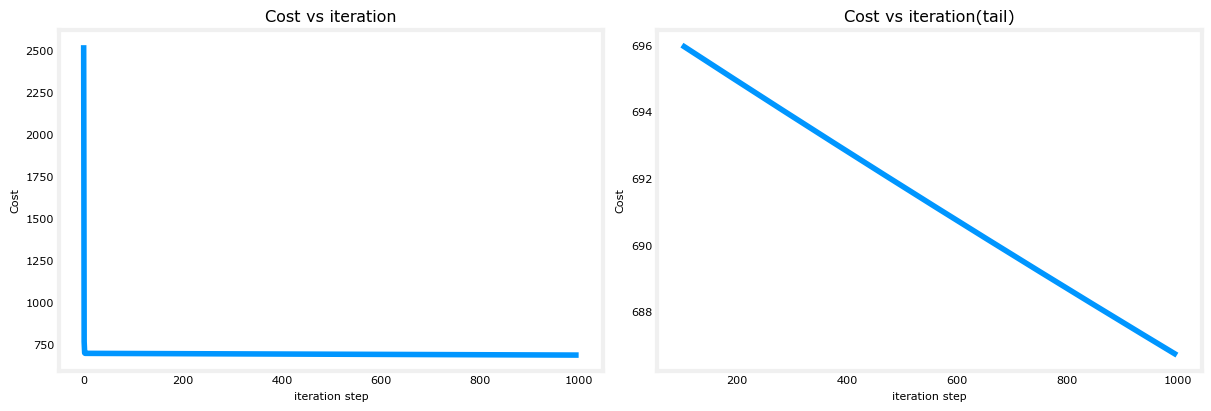

In [19]:
#Cost와 iteration을 그리기
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100+np.arange(len(J_hist[100:])),J_hist[100:])
ax1.set_title("Cost vs iteration")
ax2.set_title("Cost vs iteration(tail)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("iteration step")
ax2.set_xlabel("iteration step")
plt.show()